In [1]:
# import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the dataframe and convert the date column to a date time format
df = pd.read_csv("Data/uber-raw.csv")
df["Date/Time"] = df["Date/Time"].map(pd.to_datetime) 
df.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [3]:
# break down the date time column into the days, day of week and hour columns
df["Day"] = df["Date/Time"].apply(lambda x: x.day)
df["Weekday"] = df["Date/Time"].apply(lambda x: x.weekday())
df["Hour"] = df["Date/Time"].apply(lambda x: x.hour)
print(df.head())

            Date/Time      Lat      Lon    Base  Day  Weekday  Hour
0 2014-09-01 00:01:00  40.2201 -74.0021  B02512    1        0     0
1 2014-09-01 00:01:00  40.7500 -74.0027  B02512    1        0     0
2 2014-09-01 00:03:00  40.7559 -73.9864  B02512    1        0     0
3 2014-09-01 00:06:00  40.7450 -73.9889  B02512    1        0     0
4 2014-09-01 00:11:00  40.8145 -73.9444  B02512    1        0     0


C:\Users\quoej\AppData\Local\Temp\ipykernel_15064\2034010456.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Day"])


<AxesSubplot:xlabel='Day', ylabel='Density'>

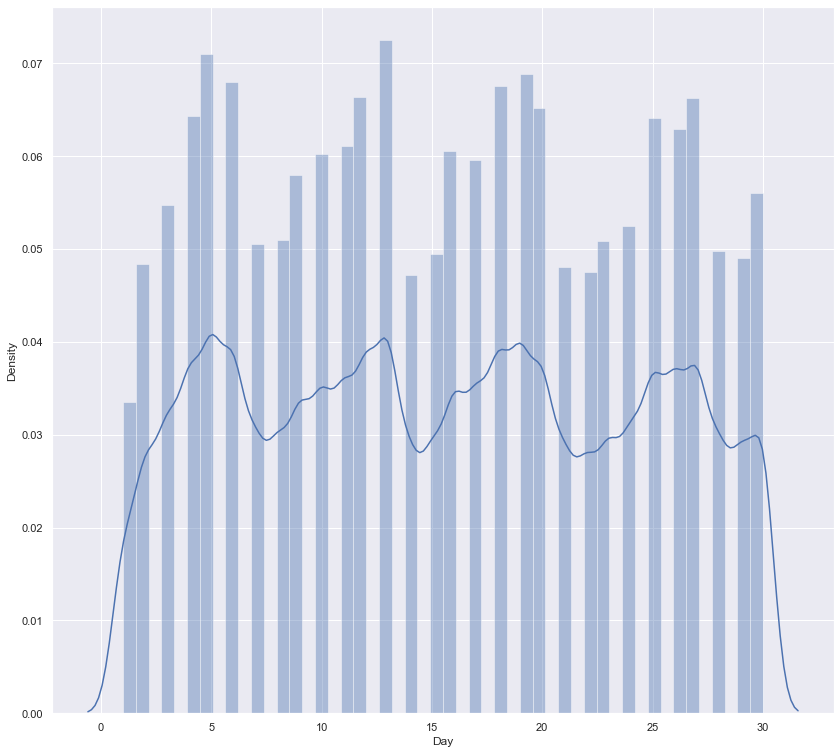

In [11]:
sns.set(rc={'figure.figsize':(14, 13)})
sns.distplot(df["Day"])

A plot of the day in the month on a chart against the density of trips for that particular day. The chart above shows that day 5 which is the beginning of the weekend, Friday had the highest density of Uber trips. And this trend ilooks to be seasonal and experienced every 7 days.

C:\Users\quoej\AppData\Local\Temp\ipykernel_15064\1297407254.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Hour"])


<AxesSubplot:xlabel='Hour', ylabel='Density'>

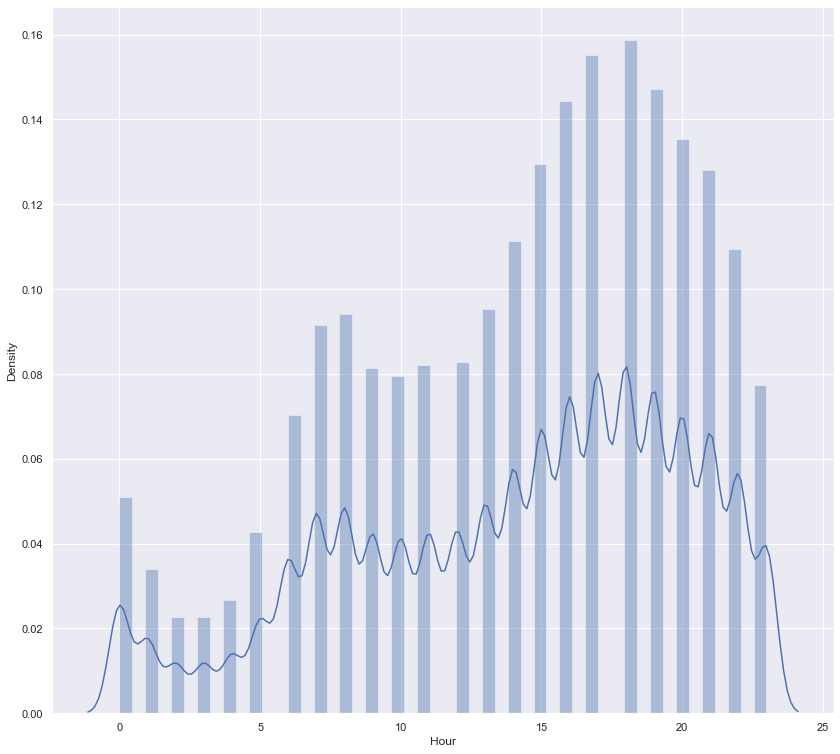

In [12]:
sns.distplot(df["Hour"])

This is the chart of the density again against the time of the day. The highest density was towards the afternoon to evening periods. From the times of 16:00 hours to about 19:00 hours which is 4 to 7 pm in the evening.

C:\Users\quoej\AppData\Local\Temp\ipykernel_15064\711552386.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Weekday"])


<AxesSubplot:xlabel='Weekday', ylabel='Density'>

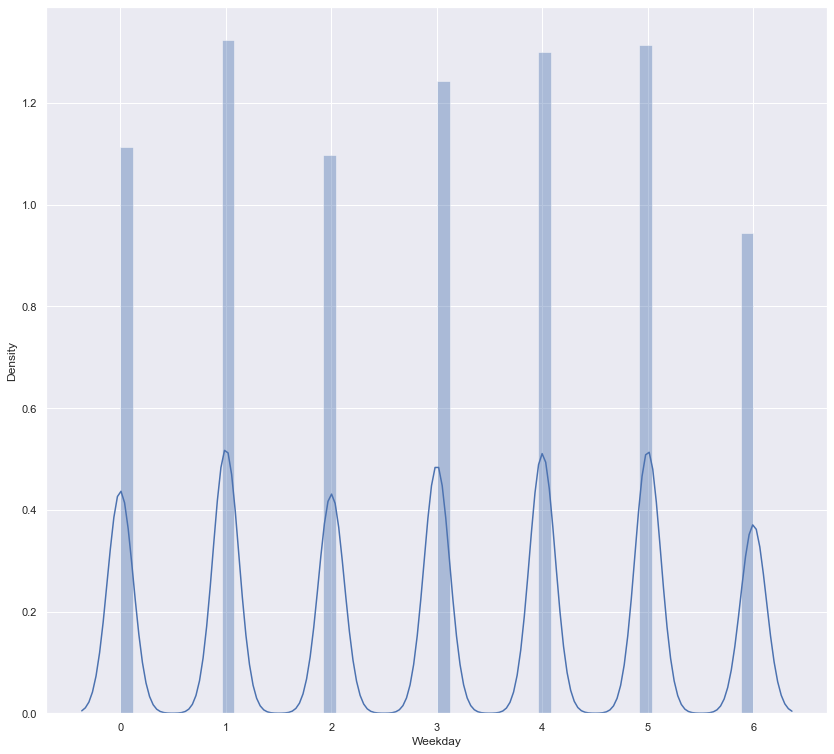

In [13]:
sns.distplot(df["Weekday"])

Surprisingly, according to this chart, after the weekends, the next day that also showed a high enough density of Uber trips was Tuesday. I would have to look into that to see if there is something happening there in NY.

<AxesSubplot:xlabel='Hour', ylabel='Weekday'>

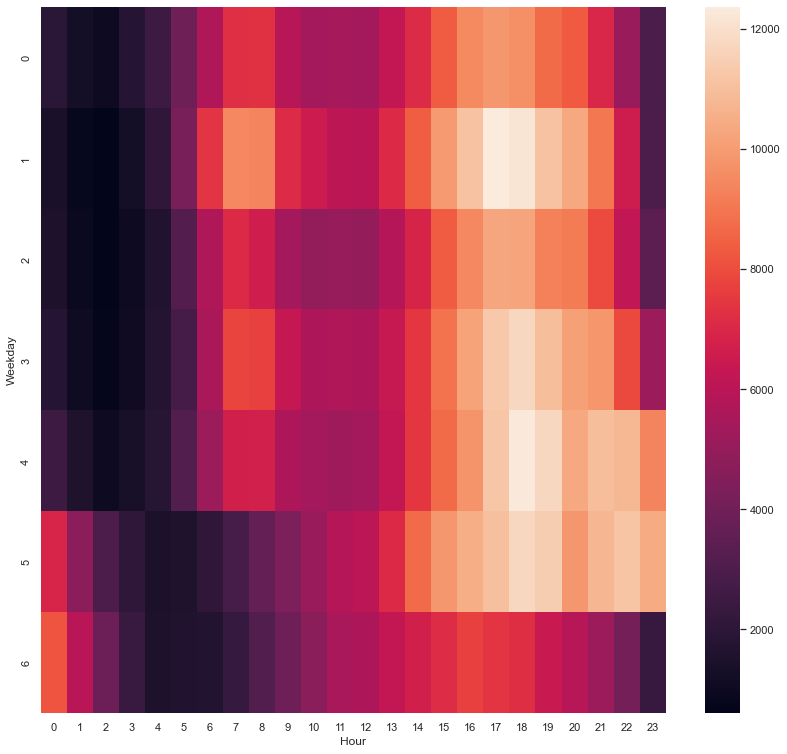

In [14]:
dfnew = df.groupby(["Weekday", "Hour"]).apply(lambda x: len(x))
dfnew = dfnew.unstack()
sns.heatmap(dfnew, annot=False)

A heat mat of the weekday against the hours of the day when the Uber trips are more freequent. The highest frequency was in the wee hours of the night. I believe that is the nightlife scene when the bars and clubs will be closing so people out to have a good time would need to get home safely.

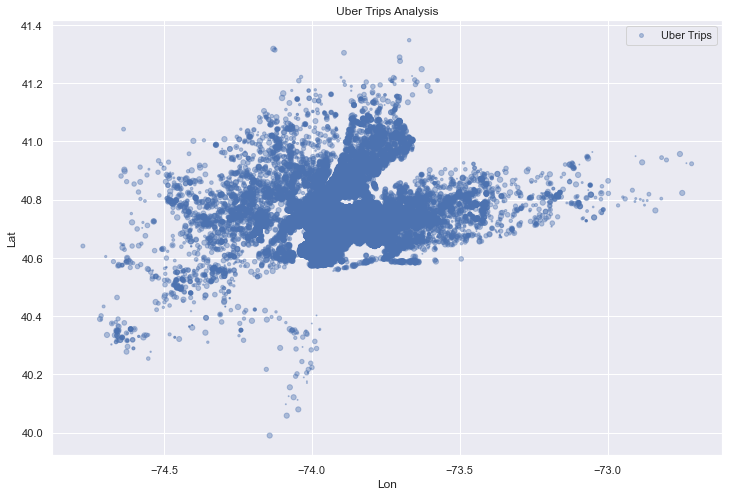

In [8]:
df.plot(kind='scatter', x='Lon', y='Lat', alpha=0.4, s=df['Day'], label='Uber Trips',
figsize=(12, 8), cmap=plt.get_cmap('jet'))
plt.title("Uber Trips Analysis")
plt.legend()
plt.show()

Geographic density map of the uber trips and where they are most concentrated.